In [8]:
import face_recognition
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img


def get_gropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0:
        return None
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, : ]

    return cropped_face

def get_face_embedding(face):
    return face_recognition.face_encodings(face)

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_gropped_face(img_path)
        if face is None:
            continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:  # 얼굴영역 face가 제대로 detect되지 않으면
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict


def get_distance(emb1, name2):
    return np.linalg.norm(emb1 - embedding_dict[name2], ord=2)

def get_nearest_face(fe, top=5):
    sort_key_func = get_sort_key_func(fe)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))



def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

### Node에서 제공해주는 함수에서 다음의 부분을 수정하였다.
### get_nearest_face에 첫번째 인자로 face embedding vector를 전달 받도록 해서
### 가장 닮은 사람을 보여주는 식이다.

In [9]:
embedding_dict = get_face_embedding_dict(os.getcwd()+'/korean/')

In [10]:
cropped_face = get_gropped_face(os.getcwd()+'/me.jpeg')
embedding = get_face_embedding(cropped_face)
get_nearest_face(embedding)

순위 0 : 이름(이승빈), 거리(0.5667721144232343)
순위 1 : 이름(야누고), 거리(0.6001599033101755)
순위 2 : 이름(김종국), 거리(0.6476785076966622)
순위 3 : 이름(정우성), 거리(0.681720656923178)
순위 4 : 이름(마동석), 거리(0.6820714416375173)
순위 5 : 이름(장승조), 거리(0.81764314653238)


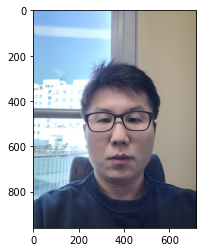

In [14]:
plt.imshow(img.imread('me.jpeg'))

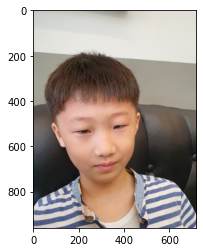

In [16]:
plt.imshow(img.imread(os.getcwd()+'/korean/이승빈.jpeg'))

## 내사진 2장으로 하면 재미 없으니 우리 아들내미 사진을 넣어서 테스트 해보았다. 역시나 우리 아들 사진이 제일 닮았다고 나온다!!! 피는 못속이나 보다...

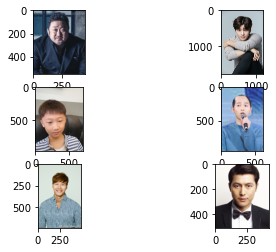

In [17]:
file_list = os.listdir(os.getcwd()+'/korean')

fig = plt.figure()
i=1

for file in file_list:
    im = img.imread(os.getcwd()+'/korean/'+file)
    ax = fig.add_subplot(3, 2, i)
    ax.imshow(im)
    i += 1

plt.show()

## 비교 사진들은 위와 같다